# Objectives
* Describe when clustering is the appropriate analysis technique
* Use scikit-learn to perform k-means clustering

## Iris Species Segmentation with Cluster Analysis

The [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is one of the most popular datasets for machine learning. 

There are 4 features: sepal length, sepal width, petal length, and petal width. We are going to seperate the data first into 2 clusters. We will then standardize our variables to more accurately train our model. Then we will use the Elbow Method to explore different numbers of clusters (2, 3 and 5). We will then load the labeled dataset to see how well our k-means clustering performed. Lastly, we will identify strengths and weaknesses of k-means clustering.

![iris](iris.png)

***

# 1. Clustering (k = 2)

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the Data

**Q1.1.** Load data from the csv file: `iris_dataset.csv`

In [3]:
# load the data
df = pd.read_csv('iris_dataset.csv')
# check the data
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the Data

For this exercise, try to cluster the iris flowers by the shape of their sepal.

**Q1.2.** Create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)

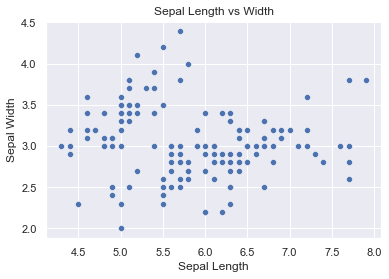

In [7]:
# scatter plot
sns.scatterplot(data=df, x = 'sepal_length', y='sepal_width')
# Name your axes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Width')
plt.show()

**Q1.3.** Create a scatter plot based on the other two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)

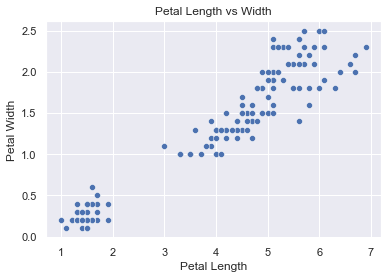

In [8]:
# scatter plot
sns.scatterplot(data=df, x = 'petal_length', y='petal_width')
# Name your axes
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.show()

It appears that, regardless of plotting sepal size or petal size, this data contains 2 groups. Let's start our clustering with k = 2.

## Clustering

**Q1.4.** Separate the original data into 2 clusters.

In [9]:
# create a variable (x) which will contain the features for clustering
X = df.copy()

# create a k-means object with 2 clusters
kmeans = KMeans(2)

# fit the data
kmeans.fit(X)

KMeans(n_clusters=2)

**Q1.5.** Create a copy of the data using the `copy()` method so we can see the clusters next to the original data and predict the cluster for each observation.

In [12]:
# copy data
clusters = df.copy()

# predict cluster
clusters['cluster'] = kmeans.fit_predict(X)
clusters

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


**Q1.6.** Create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width). Change the color of the points based on the cluster prediction from our k-means model.

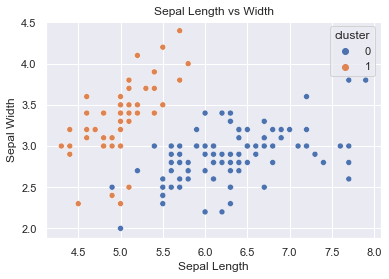

In [13]:
# scatter plot
sns.scatterplot(data=clusters, x = 'sepal_length', y='sepal_width', hue='cluster')
# Name your axes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Width')
plt.show()

**Q1.7.** Create a scatter plot based on the other two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width). Change the color of the points based on the cluster prediction from our k-means model.

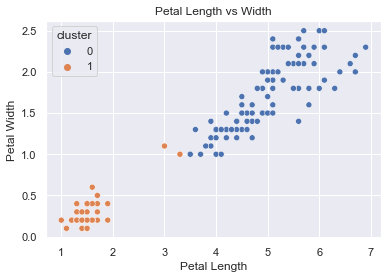

In [17]:
# scatter plot
sns.scatterplot(data=clusters, x = 'petal_length', y='petal_width', hue='cluster')
# Name your axes
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.show()

Once again regardless of plotting sepal size or petal size, it seems like our model is inaccurately predicting a small number of points (4 for sepal and 2 for petal). The difference in magnitude for width vs. length might be causing this issue, so let's tune our model by standardinzing our features. 

In [19]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


***

# 2. Tune Model

## Standardize the variables

**Q2.1.** Import and use the `scale` function from sklearn to standardize the data. 

In [21]:
# import the preprocessing module from sklearn
from sklearn import preprocessing

# scale the data for better results
X_scaled = preprocessing.scale(X)

## Clustering (scaled/standardized data)

**Q2.2.** Separate the original data into 2 clusters.

In [23]:
# create a k-means object with 2 clusters
kmeans = KMeans(2)

# fit the data
kmeans.fit(X_scaled)


KMeans(n_clusters=2)

**Q2.3.** Create a copy of the data so we can see the clusters next to the original data and predict the cluster for each observation.

In [24]:
# copy data
clusters = df.copy()

# predict cluster
clusters['cluster'] = kmeans.fit_predict(X_scaled)
clusters

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


**Q2.4.** Create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width). Change the color of the points based on the cluster prediction from our k-means model.

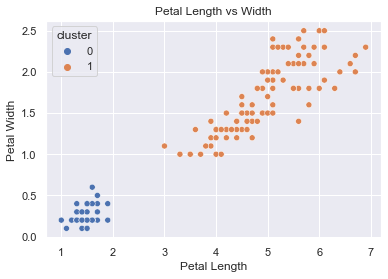

In [30]:
# scatter plot
sns.scatterplot(data=clusters, x = 'petal_length', y='petal_width', hue='cluster')
# Name your axes
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.show()

This looks much better for k = 2! But, do we know that 2 is the best number of clusters? Let's use the Elbow Method to determine the best number of clusters.

***

# 3. Determine k - Elbow Method

## WCSS

**Q3.1.** Create and fit a k-means model for 1 to 10 clusters and calculate the WCSS for each. Save these 10 values to a list called `wcss` and output the list.

In [28]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(X_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.57790500611009,
 91.1543680779766,
 80.24972235577128,
 72.43166254277776,
 63.056244057155475,
 55.37674735804436]

## The Elbow Method

**Q3.2.** Plot the WCSS curve.

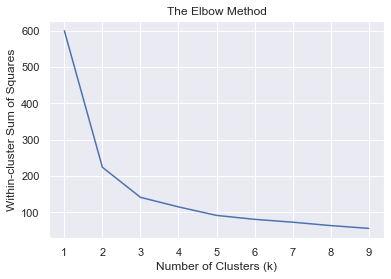

In [29]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,10)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of Clusters (k)')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

Based on the Elbow Curve, conduct k-means clustering and plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

***

# 4. Analyze Different Numbers of Clusters

Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 2 Clusters

**Q4.1.** Repeat our code from above with 2 clusters using our standardized data.

In [31]:
# create a k-means object with 2 clusters
kmeans = KMeans(2)

# fit the data
kmeans.fit(X_scaled)


KMeans(n_clusters=2)

**Q4.2.** Construct a scatter plot of the original data using the standartized clusters. *Note: we are plotting the non-standardized values of the sepal length and width.*

In [32]:
# copy data
clusters = df.copy()

# predict cluster
clusters['cluster'] = kmeans.fit_predict(X_scaled)
clusters

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


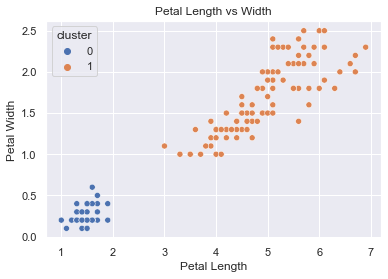

In [33]:
# scatter plot
sns.scatterplot(data=clusters, x = 'petal_length', y='petal_width', hue='cluster')
# Name your axes
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.show()

## 3 Clusters

**Q4.3.** Redo the same for 3 clusters.

In [50]:
# create a k-means object with 3 clusters
kmeans = KMeans(3)

# fit the data
kmeans.fit(X_scaled)


KMeans(n_clusters=3)

In [51]:
# copy data
clusters = df.copy()

# predict cluster
clusters['cluster'] = kmeans.fit_predict(X_scaled)
clusters

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


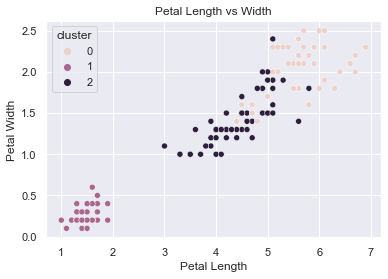

In [36]:
# scatter plot
sns.scatterplot(data=clusters, x = 'petal_length', y='petal_width', hue='cluster')
# Name your axes
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.show()

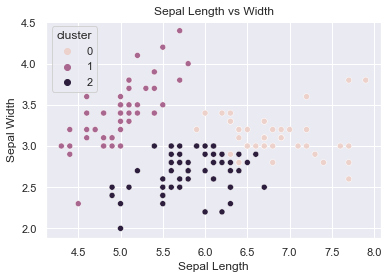

In [37]:
# scatter plot
sns.scatterplot(data=clusters, x = 'sepal_length', y='sepal_width', hue='cluster')
# Name your axes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Width')
plt.show()

## 5 Clusters

**Q4.4.** Redo the same for 5 clusters.

In [38]:
# create a k-means object with 5 clusters
kmeans = KMeans(5)

# fit the data
kmeans.fit(X_scaled)


KMeans(n_clusters=5)

In [39]:
# copy data
clusters = df.copy()

# predict cluster
clusters['cluster'] = kmeans.fit_predict(X_scaled)
clusters

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,3


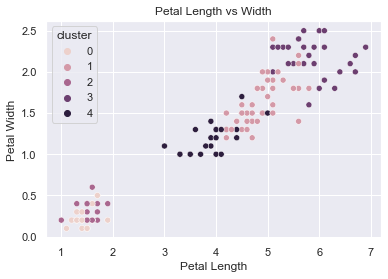

In [40]:
# scatter plot
sns.scatterplot(data=clusters, x = 'petal_length', y='petal_width', hue='cluster')
# Name your axes
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.show()

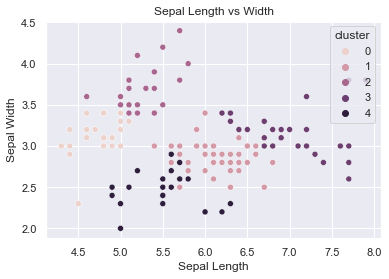

In [41]:
# scatter plot
sns.scatterplot(data=clusters, x = 'sepal_length', y='sepal_width', hue='cluster')
# Name your axes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Width')
plt.show()

# 5. Compare Solutions to the Labeled Iris Dataset

The original (full) iris data is located in `iris_with_labels.csv`. Load the csv, plot the data and compare it with your solution. 

## Load the data

**Q5.1.** Load data from the csv file: `iris_with_labels.csv`

In [43]:
# load the data
real_df = pd.read_csv('iris_with_labels.csv')
# check the data
real_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Q5.2.** Find and output the unique species in the DataFrame.

In [44]:
# unique
real_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

It looks like there are only 3 unique species of Iris. Our 2-cluster solution seemed good, but in real life the iris dataset has 3 species (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

**Q5.3.** Use the map function to change 'setosa' values to 0, 'versicolor' to 1, and 'viginica' values to 2. Inspect the first five lines of the DataFrame.

In [45]:
# map species to numbers
real_df['species']=real_df['species'].map({'setosa':0,'versicolor':1,'virginica':2})
# inspect data
real_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Plot the data

Looking at the sepal graph it seems like the clustering solution is much more intertwined than what we imagined (and what we found before). 

**Q5.4.** Plot the labeled data sepal length and width, using the species column for color.

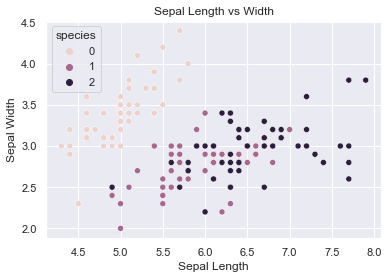

In [48]:
# scatter plot
sns.scatterplot(data=real_df, x = 'sepal_length', y='sepal_width', hue='species')
# Name your axes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Width')
plt.show()

**Q5.5.** Plot the labeled data petal length and width, using the species column for color.

In [38]:
# scatter plot

# Name your axes

# plt.show()

Examining the other scatter plot (petal length vs petal width), we see that in fact the features which actually make the species different are petals and NOT sepals!

## Cluster (k = 3) Solution

**Q5.6.** Plot the 3-cluster solution data sepal length and width. Change the color of the points based on the cluster prediction from our k-means model.

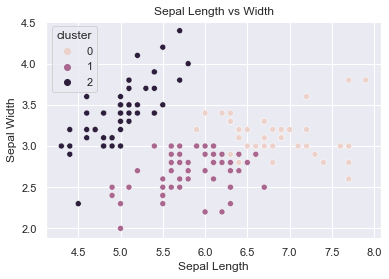

In [52]:
# scatter plot
sns.scatterplot(data=clusters, x = 'sepal_length', y='sepal_width', hue='cluster')
# Name your axes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Width')
plt.show()

**Q5.6.** Plot the 3-cluster solution data petal length and width. Change the color of the points based on the cluster prediction from our k-means model.

In [43]:
# scatter plot

# Name your axes

# plt.show()

It appears that our k-means clustering solution is using the sepal length and width more than the petal length and width to seperate the data into 3 clusters.

# 6. Conclusions

This tutorial shows us that:
* the Eblow method is imperfect (we might have opted for 2 or even 4)
* k-means is very useful when we already know the number of clusters - in this case: 3
